In [79]:
import overpy 
import geopandas as gpd
import geojson
import matplotlib.pyplot as plt
import requests
import osm2geojson
import pybdshadow
import pandas as pd
import shapely

In [125]:
api = overpy.Overpass()

# fetch all ways and nodes
overpass_url = "http://overpass-api.de/api/interpreter"
query = """
    [out:json];
    (
    way(51.528, -0.101, 51.534, -0.091) ["leisure"="park"];
    way(51.528, -0.101, 51.534, -0.091) ["building"];
    );
    (._;>;);
    out geom;
    """

response = requests.get(overpass_url, params={'data': query})
if response.status_code == 200:
    # convert result to GeoDataFrame
    data = response.json()
    geojson = osm2geojson.json2geojson(data)
    geojsonDF = gpd.GeoDataFrame.from_features(geojson)

https://overpass-turbo.eu/s/1HVm

In [126]:
temp = geojsonDF.tags.apply(pd.Series)

In [127]:
levels = temp['building:levels'].fillna(1)
approx_ht = temp.height.fillna(round(levels.astype(int) * 128/36))

In [136]:
geojsonDF['height'] = approx_ht.astype(int)
geojsonDF['leisure'] = temp.leisure

In [153]:
geojsonDF.loc[geojsonDF['leisure'] == 'park', 'height'] = 0
parks = geojsonDF.loc[geojsonDF['leisure'] == 'park']
mass = geojsonDF.loc[geojsonDF['leisure'] != 'park']
parks

,geometry,type,id,tags,nodes,height,leisure
2832,"POLYGON ((-0.09472 51.53242, -0.09373 51.53273...",way,39658932,"{'dog': 'leashed', 'leisure': 'park', 'name': ...","[475413372, 475413374, 8386357250, 8386357249,...",0.0,park
2900,"POLYGON ((-0.09874 51.53196, -0.09878 51.53199...",way,67384696,"{'leisure': 'park', 'name': 'Graham Street Par...","[674209659, 560505142, 674209663, 813784736, 8...",0.0,park
3226,"POLYGON ((-0.09176 51.53261, -0.09106 51.53281...",way,231867400,"{'leisure': 'park', 'name': 'Community Garden'}","[2401927297, 2401927298, 2401927299, 240192730...",0.0,park
3263,"POLYGON ((-0.10099 51.52930, -0.10076 51.53026...",way,477378856,"{'leisure': 'park', 'operator': 'Islington Cou...","[1623696388, 1623696387, 1623696386, 162369638...",0.0,park


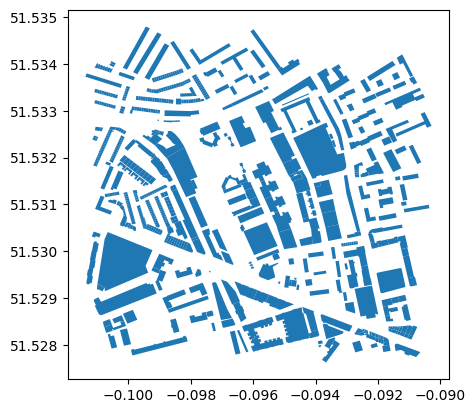

In [149]:
geojsonDF.plot(markersize=0)
plt.gca().set_aspect(1.5)
plt.show()

In [154]:
buildings = pybdshadow.bd_preprocess(mass)

C:\Python311\Lib\site-packages\geopandas\geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [155]:
#Given UTC time
date = pd.to_datetime('2022-01-01 12:45:33.959797119')\
    .tz_localize('Europe/London')\
    .tz_convert('UTC')
#Calculate shadows
shadows = pybdshadow.bdshadow_sunlight(buildings,date,roof=True,include_building = False)
shadows

C:\Python311\Lib\site-packages\geopandas\array.py:1459: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  return GeometryArray(data, crs=_get_common_crs(to_concat))
C:\Python311\Lib\site-packages\geopandas\array.py:1459: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  return GeometryArray(data, crs=_get_common_crs(to_concat))
C:\Python311\Lib\site-packages\geopandas\array.py:1459: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  return GeometryArray(data, crs=_get_common_crs(to_concat))
C:\Python311\Lib\site-packages\geopandas\array.py:1459: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  return GeometryArray(data, crs=_get_common_crs(to_concat))
C:\Python311

,height,building_id,geometry,type
0,4.0,2828,"POLYGON ((-0.09442 51.52881, -0.09442 51.52881...",roof
1,4.0,2834,"POLYGON ((-0.09473 51.53149, -0.09473 51.53149...",roof
2,4.0,2836,"POLYGON ((-0.09546 51.53242, -0.09546 51.53242...",roof
3,4.0,2866,"POLYGON ((-0.09272 51.53053, -0.09272 51.53053...",roof
4,4.0,2904,"POLYGON ((-0.09853 51.53060, -0.09853 51.53060...",roof
...,...,...,...,...
2759,0.0,2759,POLYGON EMPTY,ground
2760,0.0,2760,POLYGON EMPTY,ground
2761,0.0,2761,POLYGON EMPTY,ground
2762,0.0,2762,POLYGON EMPTY,ground


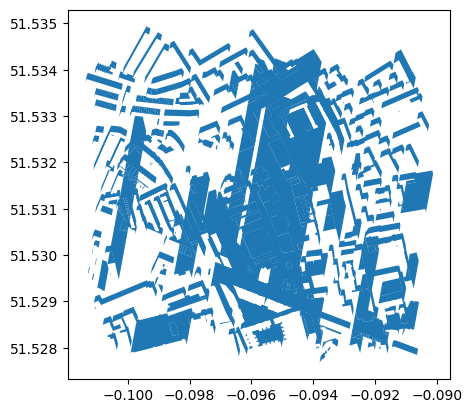

In [156]:
shadows.plot(markersize=0)
plt.gca().set_aspect(1.5)
plt.show()

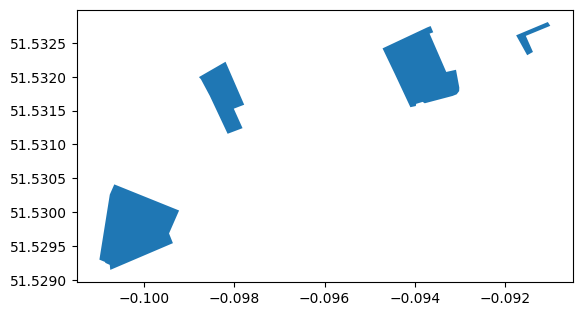

In [147]:
parks.plot(markersize=0)
plt.gca().set_aspect(1.5)
plt.show()

In [158]:
shadows_all = shadows.geometry.unary_union

In [165]:
parks_unshaded  = parks.geometry.difference(shadows_all)

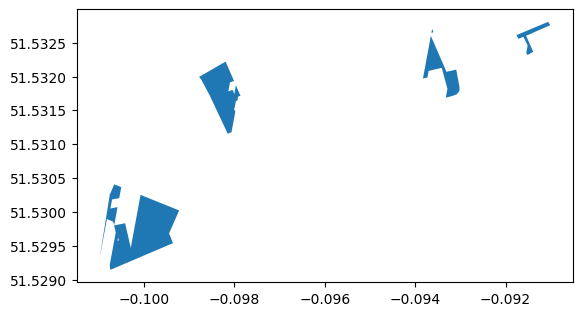

In [166]:
parks_unshaded.plot(markersize=0)
plt.gca().set_aspect(1.5)
plt.show()

In [167]:
parks_unshaded

2832    MULTIPOLYGON (((-0.09359 51.53266, -0.09364 51...
2900    POLYGON ((-0.09878 51.53199, -0.09819 51.53222...
3226    POLYGON ((-0.09106 51.53281, -0.09101 51.53276...
3263    MULTIPOLYGON (((-0.10076 51.53026, -0.10066 51...
dtype: geometry

### Sunniness percentage of each park:

In [169]:
parks_unshaded.area/parks.area * 100

2832    20.401897
2900    85.833568
3226    75.028092
3263    68.957456
dtype: float64

In [181]:
parks

,geometry,type,id,tags,nodes,height,leisure
2832,"POLYGON ((-0.09472 51.53242, -0.09373 51.53273...",way,39658932,"{'dog': 'leashed', 'leisure': 'park', 'name': ...","[475413372, 475413374, 8386357250, 8386357249,...",0.0,park
2900,"POLYGON ((-0.09874 51.53196, -0.09878 51.53199...",way,67384696,"{'leisure': 'park', 'name': 'Graham Street Par...","[674209659, 560505142, 674209663, 813784736, 8...",0.0,park
3226,"POLYGON ((-0.09176 51.53261, -0.09106 51.53281...",way,231867400,"{'leisure': 'park', 'name': 'Community Garden'}","[2401927297, 2401927298, 2401927299, 240192730...",0.0,park
3263,"POLYGON ((-0.10099 51.52930, -0.10076 51.53026...",way,477378856,"{'leisure': 'park', 'operator': 'Islington Cou...","[1623696388, 1623696387, 1623696386, 162369638...",0.0,park
